# Questão 3 - Prova 2 de Inteligência Artificial

## Lucas Nóbrega e Nathália de Vasconcelos

# 1. Pré-processamento de dados

In [63]:
# Importando as bibliotecas
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

# Importando os datasets
dataset_treino = pd.read_csv('base_treinamento.csv')
X = dataset_treino.iloc[:, :-2].values
y = dataset_treino.iloc[:, [5,6]].values


dataset_teste = pd.read_csv('base_teste.csv')
Xt = dataset_teste.iloc[:, :-2].values
yt = dataset_teste.iloc[:, [5,6]].values

In [2]:
dataset_treino.describe()

,AP1,AP2,AP3,AP4,AP5,Coordenada X,Coordenada Y
count,262.00000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000
mean,-67.90458,-62.129771,-58.122137,-71.454198,-65.183206,12.026985,12.612634
std,10.29165,8.530672,8.323924,9.232823,7.128596,5.079505,5.139619
min,-90.00000,-81.000000,-75.000000,-86.000000,-84.000000,1.390000,1.570000
25%,-75.75000,-68.000000,-65.000000,-78.000000,-69.000000,8.442500,9.412500
50%,-69.00000,-63.000000,-58.000000,-74.000000,-65.000000,12.400000,13.630000
75%,-61.00000,-57.000000,-53.000000,-66.250000,-60.000000,16.357500,16.710000
max,-38.00000,-35.000000,-33.000000,-38.000000,-51.000000,20.450000,19.630000


In [3]:
dataset_teste.describe()

,AP1,AP2,AP3,AP4,AP5,Coordenada X,Coordenada Y
count,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000
mean,-56.953846,-63.815385,-62.030769,-69.261538,-65.815385,12.094923,12.153231
std,8.088245,7.717456,8.154694,9.361285,10.037262,5.005830,4.951980
min,-71.000000,-82.000000,-76.000000,-82.000000,-86.000000,2.410000,2.110000
25%,-63.000000,-69.000000,-67.000000,-76.000000,-74.000000,8.370000,9.090000
50%,-58.000000,-64.000000,-62.000000,-73.000000,-68.000000,12.950000,12.580000
75%,-52.000000,-58.000000,-58.000000,-64.000000,-59.000000,15.480000,17.490000
max,-39.000000,-51.000000,-43.000000,-43.000000,-42.000000,20.460000,19.120000


### Melhorando a visualização dos datasets...

In [4]:
print(pd.options.display.max_columns, pd.options.display.max_rows)
pd.options.display.max_columns = 7
pd.options.display.max_rows = 262

20 60


### Visualizando os datasets em formato de boxplot...

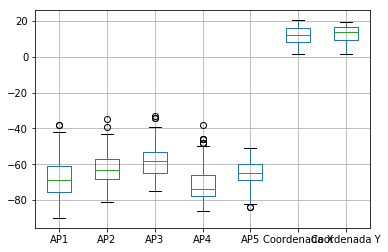

In [5]:
dataset_treino.boxplot()

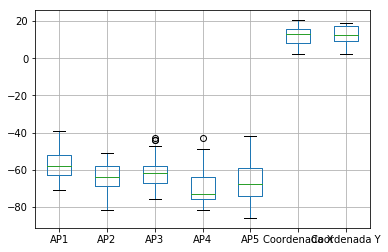

In [6]:
dataset_teste.boxplot()

### Checando se existe algum dado incompleto nos datasets...

In [7]:
dataset_treino.isnull().values.any()

False

In [8]:
dataset_teste.isnull().values.any()

False

### Analisando os histogramas

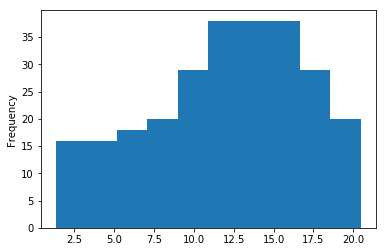

In [9]:
dataset_treino['Coordenada X'].plot(kind='hist')

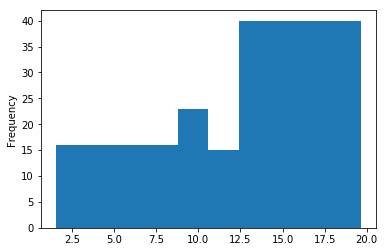

In [10]:
dataset_treino['Coordenada Y'].plot(kind='hist')

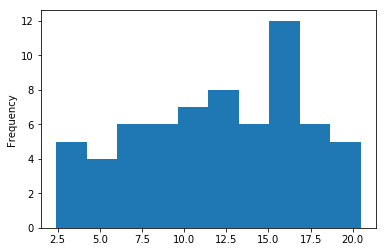

In [11]:
dataset_teste['Coordenada X'].plot(kind='hist')

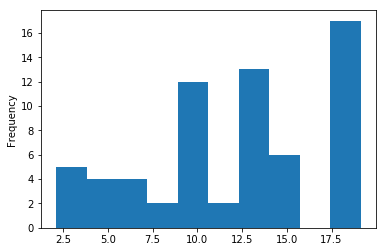

In [12]:
dataset_teste['Coordenada Y'].plot(kind='hist')

### Preparando as variáveis para treino e teste dos algoritmos de aprendizado de máquina... 

In [30]:
X_train = X
X_test = Xt
y_train = y
y_test = yt

### Plotando os gráficos de correlação dos datasets...

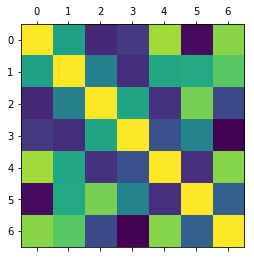

In [14]:
plt.matshow(dataset_treino.corr())

In [15]:
print(dataset_treino.corr())

                   AP1       AP2       AP3       AP4       AP5  Coordenada X  \
AP1           1.000000  0.239991 -0.579181 -0.479896  0.749445     -0.732574   
AP2           0.239991  1.000000 -0.009559 -0.552974  0.286467      0.307589   
AP3          -0.579181 -0.009559  1.000000  0.262054 -0.519194      0.635752   
AP4          -0.479896 -0.552974  0.262054  1.000000 -0.336926      0.011004   
AP5           0.749445  0.286467 -0.519194 -0.336926  1.000000     -0.543906   
Coordenada X -0.732574  0.307589  0.635752  0.011004 -0.543906      1.000000   
Coordenada Y  0.683116  0.544512 -0.382358 -0.783691  0.676932     -0.236476   

              Coordenada Y  
AP1               0.683116  
AP2               0.544512  
AP3              -0.382358  
AP4              -0.783691  
AP5               0.676932  
Coordenada X     -0.236476  
Coordenada Y      1.000000  


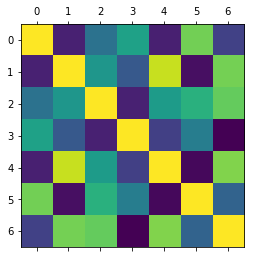

In [16]:
plt.matshow(dataset_teste.corr())

In [17]:
print(dataset_teste.corr())

                   AP1       AP2       AP3       AP4       AP5  Coordenada X  \
AP1           1.000000 -0.624181 -0.116768  0.236859 -0.632930      0.618729   
AP2          -0.624181  1.000000  0.151045 -0.290863  0.849767     -0.720831   
AP3          -0.116768  0.151045  1.000000 -0.625816  0.189058      0.347374   
AP4           0.236859 -0.290863 -0.625816  1.000000 -0.453619     -0.030745   
AP5          -0.632930  0.849767  0.189058 -0.453619  1.000000     -0.753619   
Coordenada X  0.618729 -0.720831  0.347374 -0.030745 -0.753619      1.000000   
Coordenada Y -0.446523  0.626146  0.578855 -0.791972  0.657350     -0.220059   

              Coordenada Y  
AP1              -0.446523  
AP2               0.626146  
AP3               0.578855  
AP4              -0.791972  
AP5               0.657350  
Coordenada X     -0.220059  
Coordenada Y      1.000000  


### Alterando a escala dos dados para que nenhum deles seja menos relevante do que o outro na fase de treinamento do aprendizado de máquina.

In [18]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

/home/nath/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


# 2. Regressão Linear Múltipla

In [19]:
# Realizando o fitting da regressão linear múltipla para a base de treinamento
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [20]:
# Prevendo os resultados da base de testes
y_pred = regressor.predict(X_test)

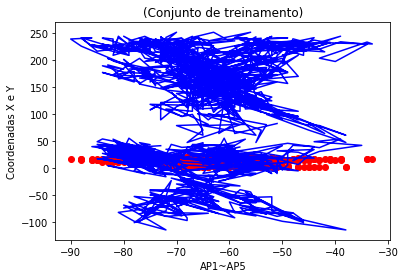

In [87]:
# Visualizando os resultados da base de treinamento

plt.scatter(X_train[:, 0:1], y_train[:, 0:1], color = 'red')
plt.scatter(X_train[:, 2:3], y_train[:, 0:1], color = 'red')
plt.scatter(X_train[:, [4]], y_train[:, 0:1], color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('(Conjunto de treinamento)')
plt.xlabel('AP1~AP5')
plt.ylabel('Coordenadas X e Y')
plt.show()

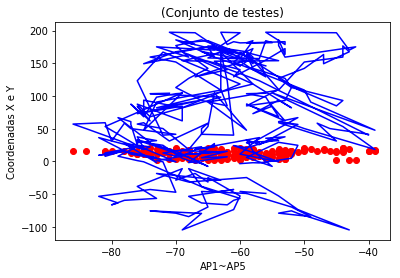

In [91]:
# Visualizando os resultados da base de testes

plt.scatter(X_test[:, 0:1], y_test[:, 0:1], color = 'red')
plt.scatter(X_test[:, 2:3], y_test[:, 0:1], color = 'red')
plt.scatter(X_test[:, [4]], y_test[:, 0:1], color = 'red')
plt.plot(X_test, regressor.predict(X_test), color = 'blue')
plt.title('(Conjunto de testes)')
plt.xlabel('AP1~AP5')
plt.ylabel('Coordenadas X e Y')
plt.show()

### Erro quadrático médio


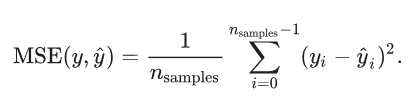

In [23]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred, sample_weight = None, multioutput = 'uniform_average')
print(mse)

56.646896956570345


### R2 Score

In [24]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred, sample_weight = None, multioutput = 'uniform_average')
print(r2)

-1.2989903058092338


# 3. Árvore de Decisão

### Importando a ED do tipo árvore para aplicar a árvore de decisão
### Fitting com a base de treinamento

In [67]:
from sklearn import tree
tree = tree.DecisionTreeRegressor()
tree = tree.fit(X_train, y_train)

### Prevendo os resultados da base de teste

In [68]:
y_pred = tree.predict(X_test)

### Plotando o gráfico da árvore de decisão

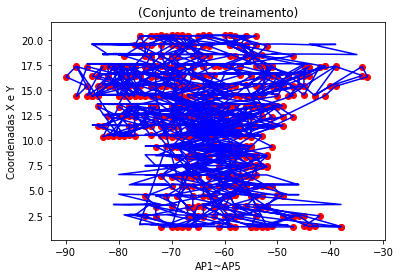

In [88]:
plt.scatter(X_train[:, 0:1], y_train[:, 0:1], color = 'red')
plt.scatter(X_train[:, 2:3], y_train[:, 0:1], color = 'red')
plt.scatter(X_train[:, [4]], y_train[:, 0:1], color = 'red')
plt.plot(X_train, tree.predict(X_train), color = 'blue')
plt.title('(Conjunto de treinamento)')
plt.xlabel('AP1~AP5')
plt.ylabel('Coordenadas X e Y')
plt.show()

### Erro quadrático médio

In [93]:
mse = mean_squared_error(y_test, y_pred, sample_weight = None, multioutput = 'uniform_average')
print(mse)

69.74696461538458


### R2 Score

In [72]:
r2 = r2_score(y_test, y_pred, sample_weight = None, multioutput = 'uniform_average')
print(r2)

-1.8473663133823437
